## Seaborn - 연구자를 위한 시각화 도구

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

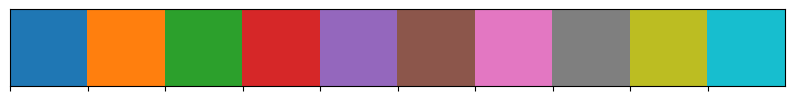

In [2]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

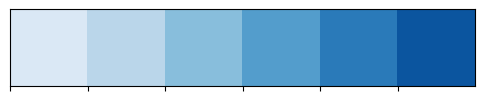

In [3]:
sns.palplot(sns.color_palette("Blues"))

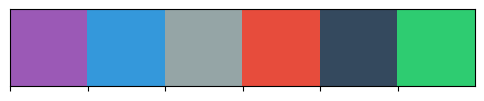

In [4]:
# 팔레트 색상을 직접 설정 가능
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

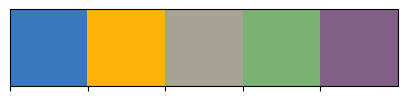

In [9]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))
# xkcd 색상에 이름 붙임

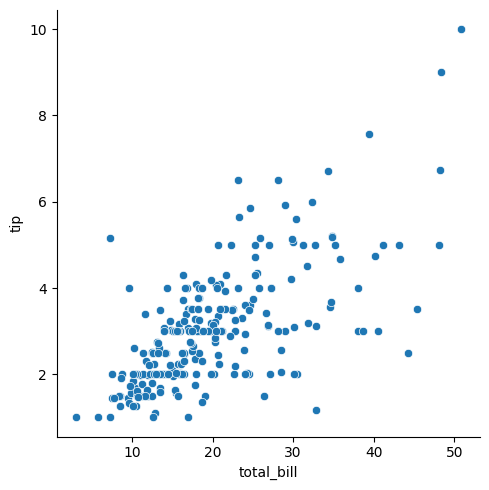

In [16]:
# 두 변수 사이의 관계 표현하는 목적이 있는 관계산점도
tips = sns.load_dataset("tips")
# dataset 테스트용 데이터셋을 저장해둠. 이 데터셋 중 tips를 꺼내 쓰는 것
# tips
sns.relplot(x="total_bill", y="tip", data=tips)

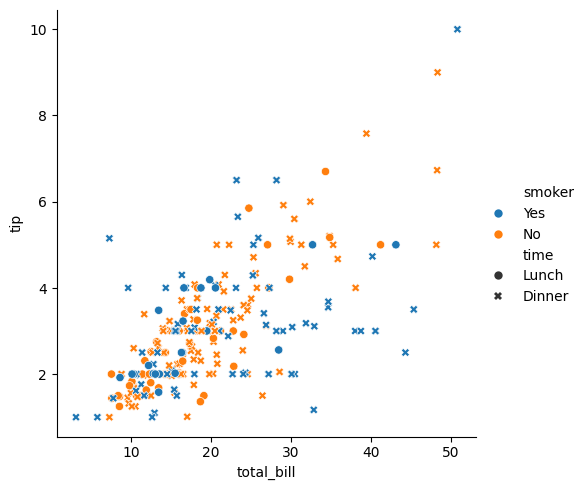

In [21]:
# 범주형 변수와 시각화 특성 바인딩
sns.relplot(x="total_bill", y="tip", 
            # 이건 모양
            hue="smoker", style="time", data=tips)
            # hue는 색상으로 매핑(구분), style 어떤 모양으로 구분할지
# sns.scatterplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);
# 한번에 많은 자료를 담는게 좋지만 가독성을 해치면 안 된다.
plt.show()

In [32]:
# 위 그래프를 수치화 해보기
type(tips)
print( tips.columns )
print( tips.groupby("smoker")['tip'].mean() )
# 흡연 여부를 그룹화해서 평균내보기
print( tips.groupby("time")['tip'].mean() )
# 이게 유의미한 차이인지 통계적 분석 필요
print( tips.groupby("sex")['tip'].mean() )
print( tips.groupby("day")['tip'].mean() )


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64
time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64
sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64
day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64


C:\Users\human\AppData\Local\Temp\ipykernel_6812\183686382.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print( tips.groupby("smoker")['tip'].mean() )
C:\Users\human\AppData\Local\Temp\ipykernel_6812\183686382.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print( tips.groupby("time")['tip'].mean() )
C:\Users\human\AppData\Local\Temp\ipykernel_6812\183686382.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p

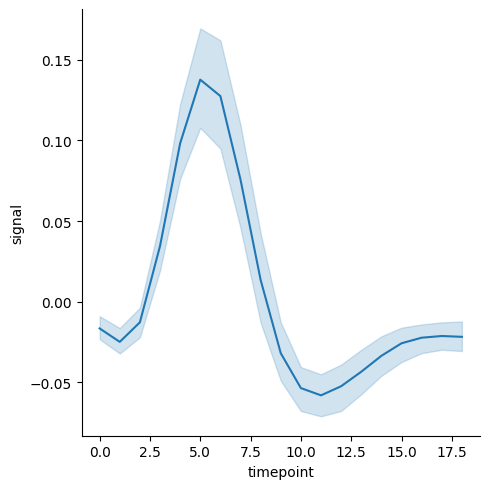

In [37]:
# 두 변수 사이의 관계
# 불확실성 표시
fmri = sns.load_dataset("fmri")
# fmri
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)
# rleplot 기본은 산점도, 여기선 kind를 line으로 바꿔서 선그래프로 바꿈
# 겉의 색은 오차, 신뢰범위

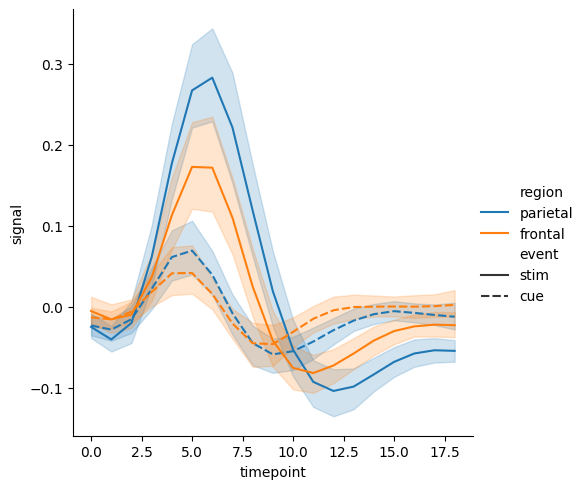

In [40]:
# 데이터와 시각화 특성 바인딩
sns.relplot(x="timepoint", y="signal", hue="region", style="event", kind="line", data=fmri)
plt.show()

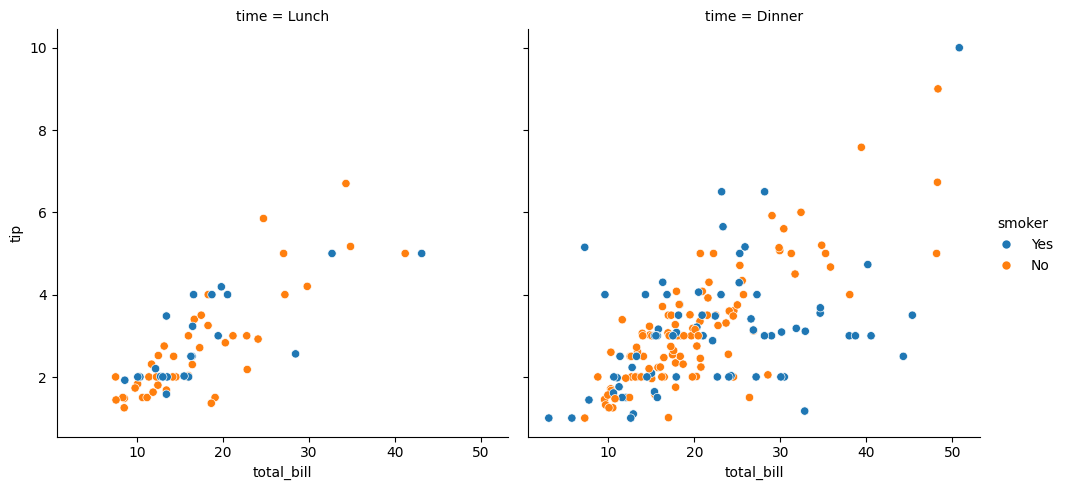

In [43]:
# 컬럼에 비교할 분류 바인딩
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)
# col은 그래프를 두개로 나눠서 보겠다는 것
plt.show()

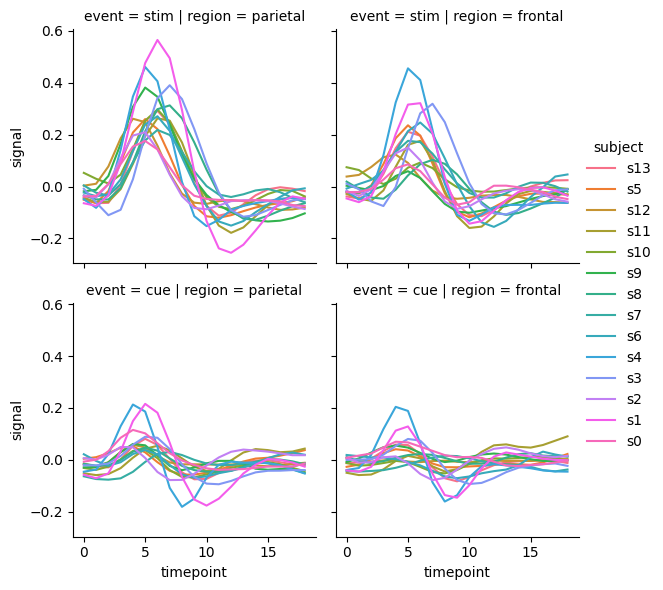

In [47]:
# 행과 열에 비교할 분류 바인딩
sns.relplot(x="timepoint", y="signal", hue="subject",col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri)
# sns.relplot(x="timepoint", y="signal", hue="subject",col="region", row="event", height=3,
#             kind="line", data=fmri)
# col과 row를 줘서 가로 세로 표현하게 함
plt.show()

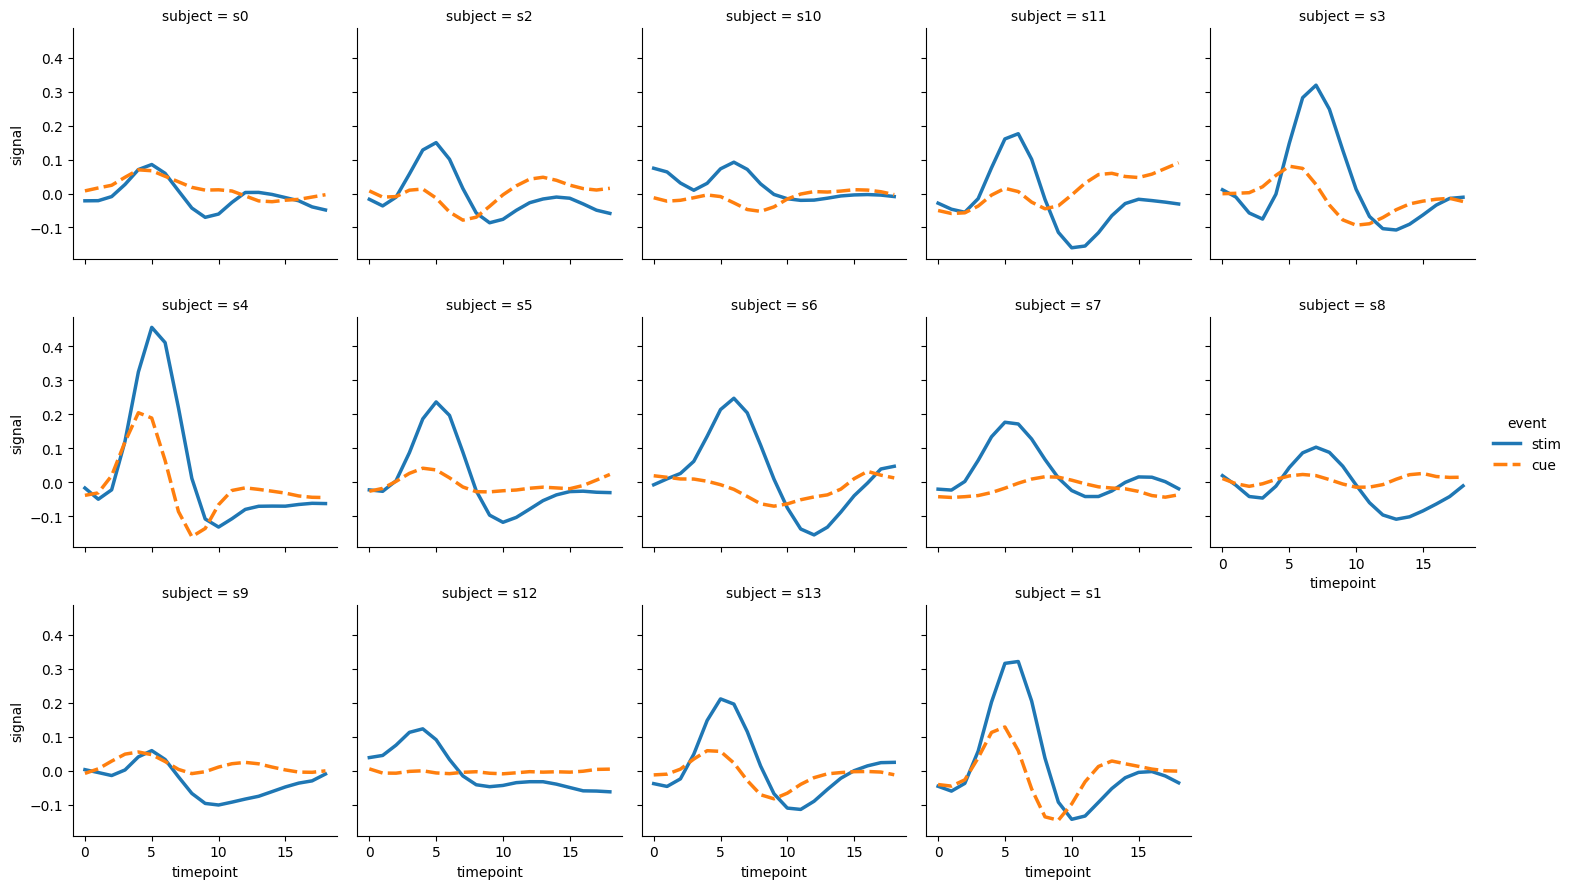

In [49]:
# 비교할 분류가 많은 경우 한 행에 표시할 최대 플롯 개수 지정 : wrap
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
col="subject", col_wrap=5, height=3, linewidth=2.5,
kind="line", data=fmri.query("region == 'frontal'"));
# col을 5개까지 표현

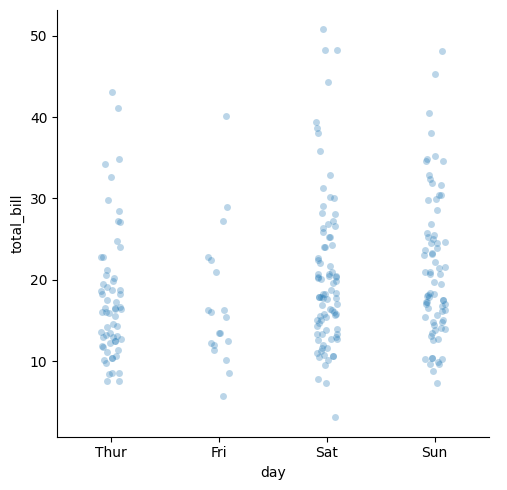

In [57]:
# 기본 범주 데이터 산점도 그래프
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips, jitter=True, alpha = 0.3); 
# 지금은 카테고리(category) 플롯임. 범주형 플롯임
# jitter : easing overplotting

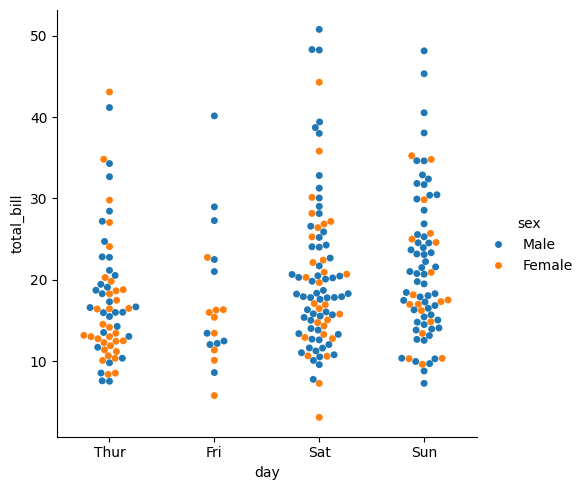

In [60]:
# beeswarm형 그래프
# over ploting 완화 방식. 지터를 좀더 예쁘게 찍는 느낌
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips); 
# kind="swarm" : easing overplotting

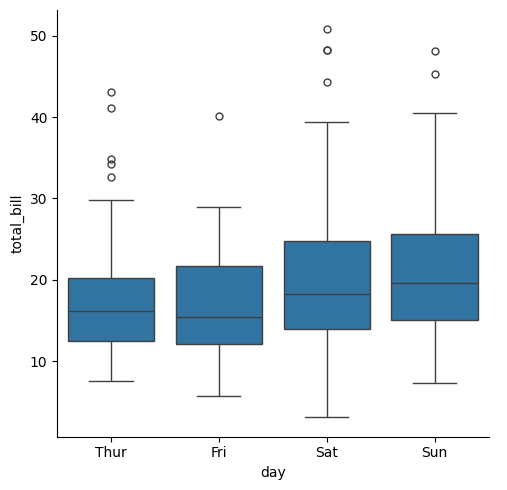

In [62]:
# 기본 박스 플롯
sns.catplot(x="day", y="total_bill", kind="box", data=tips)
plt.show()

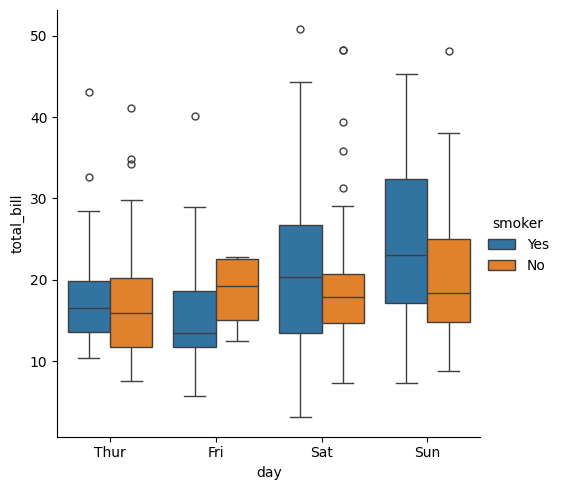

In [65]:
# 데이터와 시각화 요소 바인딩
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)
plt.show()

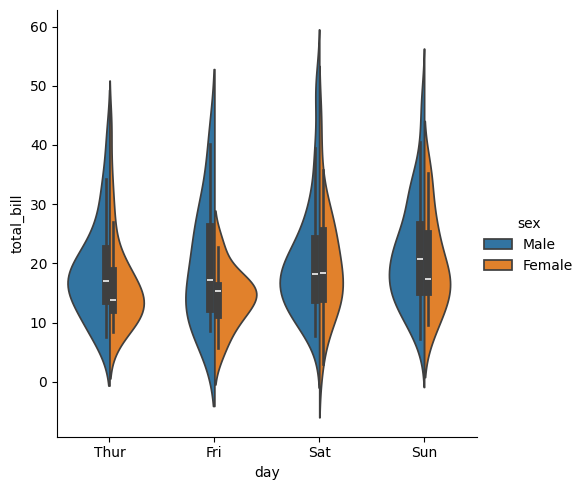

In [66]:
# 바이올린 플롯
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips)
plt.show()

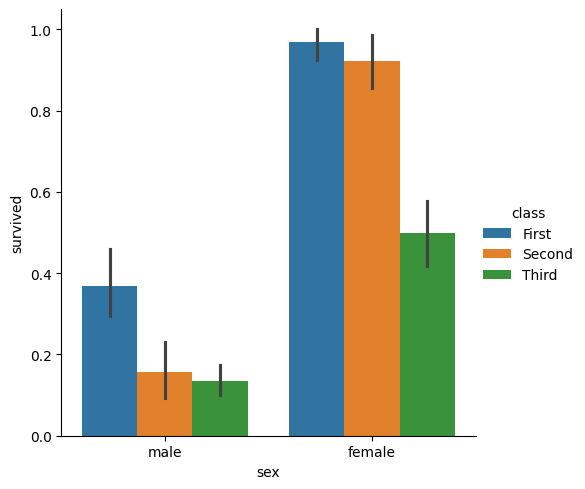

In [71]:
#Bar plot
titanic = sns.load_dataset("titanic")
# titanic
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)
plt.show()

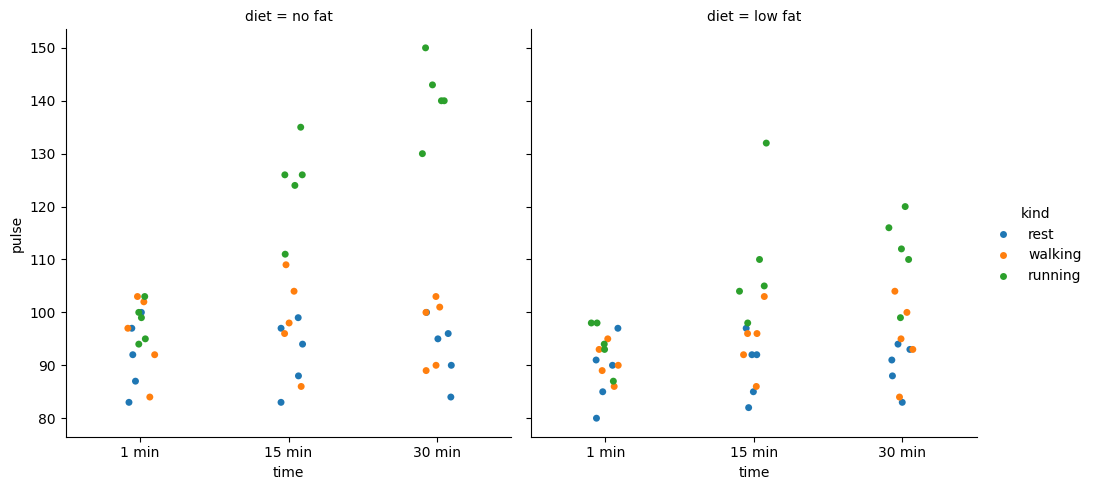

In [72]:
exercise = sns.load_dataset("exercise")
sns.catplot(x="time", y="pulse", hue="kind", col="diet", data=exercise)

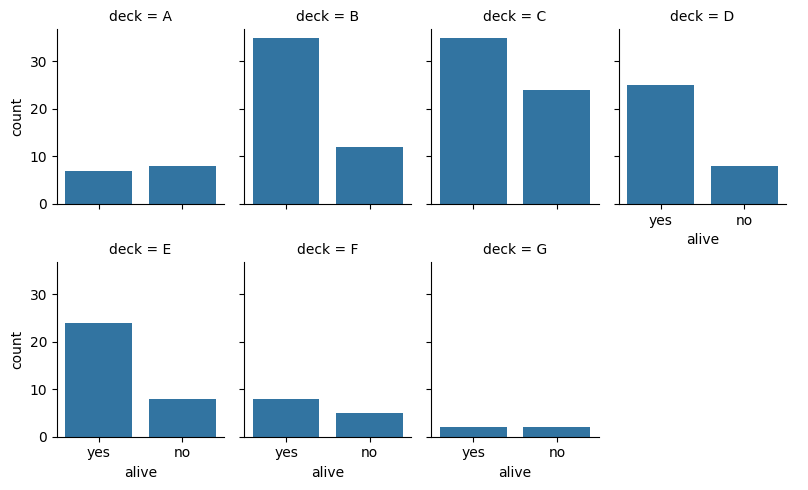

In [74]:
titanic = sns.load_dataset("titanic")
g = sns.catplot(x="alive", col="deck", col_wrap=4, data=titanic[titanic.deck.notnull()], 
                kind="count", height=2.5, aspect=.8, )

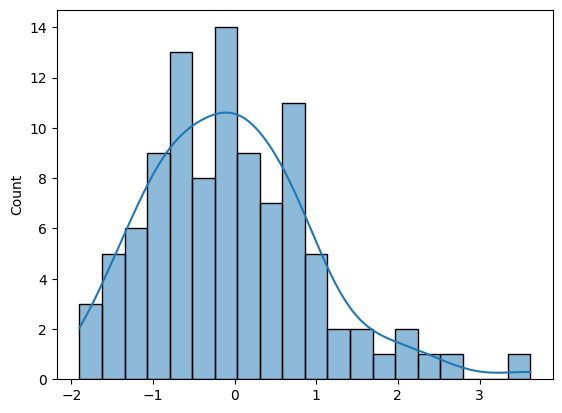

In [81]:
# 일변량 분포 시각화
x = np.random.normal(size=100)
# sns.distplot(x, bins=20, kde=True, rug=True)
# 러그는 실 데이터의 위치 근데 별 영양가는 없음
sns.histplot(x, bins=20, kde=True)
# kde : kernel density estimation
# kde 추정치다. kernel은 수학적인 트릭이다. 
plt.show()


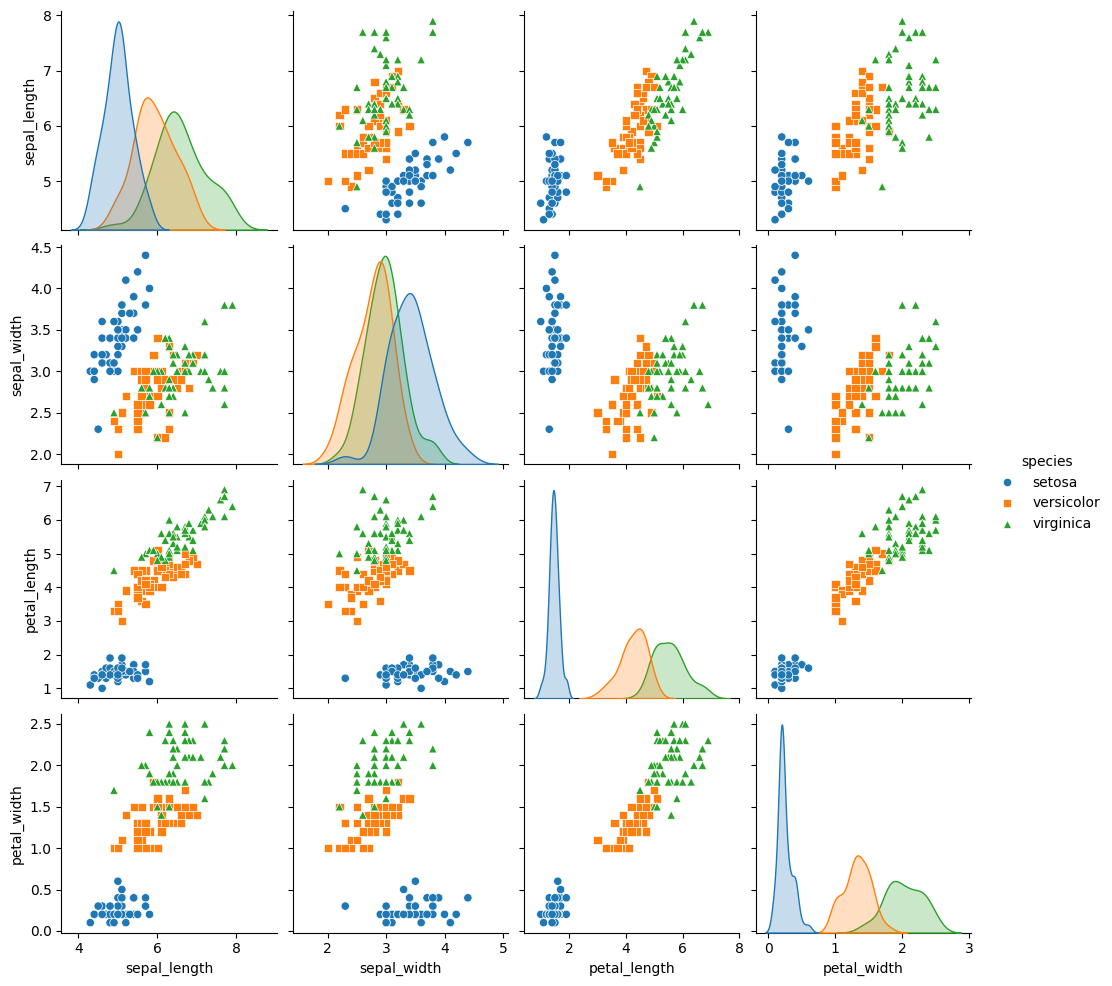

In [84]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species", markers=["o", "s", "^"]) 
# markers는 hue를 지정했을 경우에만 사용 가능하며 hue에 지정된 컬럼의 데이터 범주의 개수와 일치
plt.show()
# 종에 따른 구분으로
# 1행 2열(s_l, s_w) 그래프 보면, 주황색 초록색 섞여있음 > 이 조합은 구분이 잘 안된다.

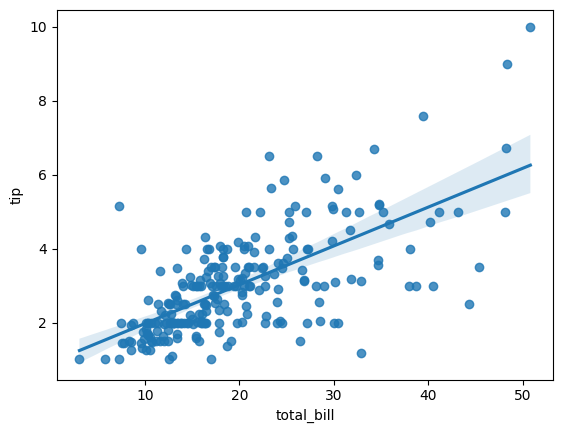

In [86]:
# 선형 관계 시각화
sns.regplot(x="total_bill", y="tip", data=tips)
plt.show()
# regplot 기본은 산점도 > 두 변수사이 상관관계를 짐작 가능 한데
# 이걸 좀 더 직관적으로 회귀선을 그려줌
# 이때의 회귀선의 의미는 이 데이터의 경향성, 관계성을 가장 효과적으로 표현한 선
# 이 선의 기울기로 관계 강도를 짐작 가능. 수직일수록 관계가 강하고, 수평일수록 약함

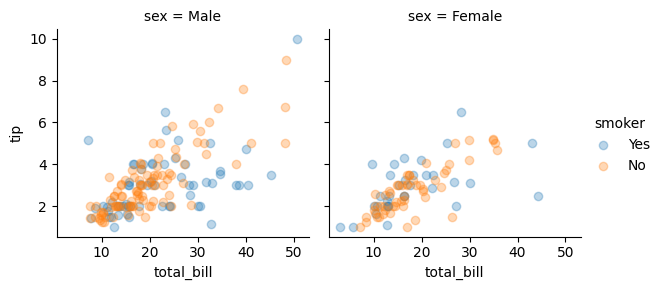

In [90]:
# 데이터와 시각화 속성 매핑
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.3)
g.add_legend()
plt.show()

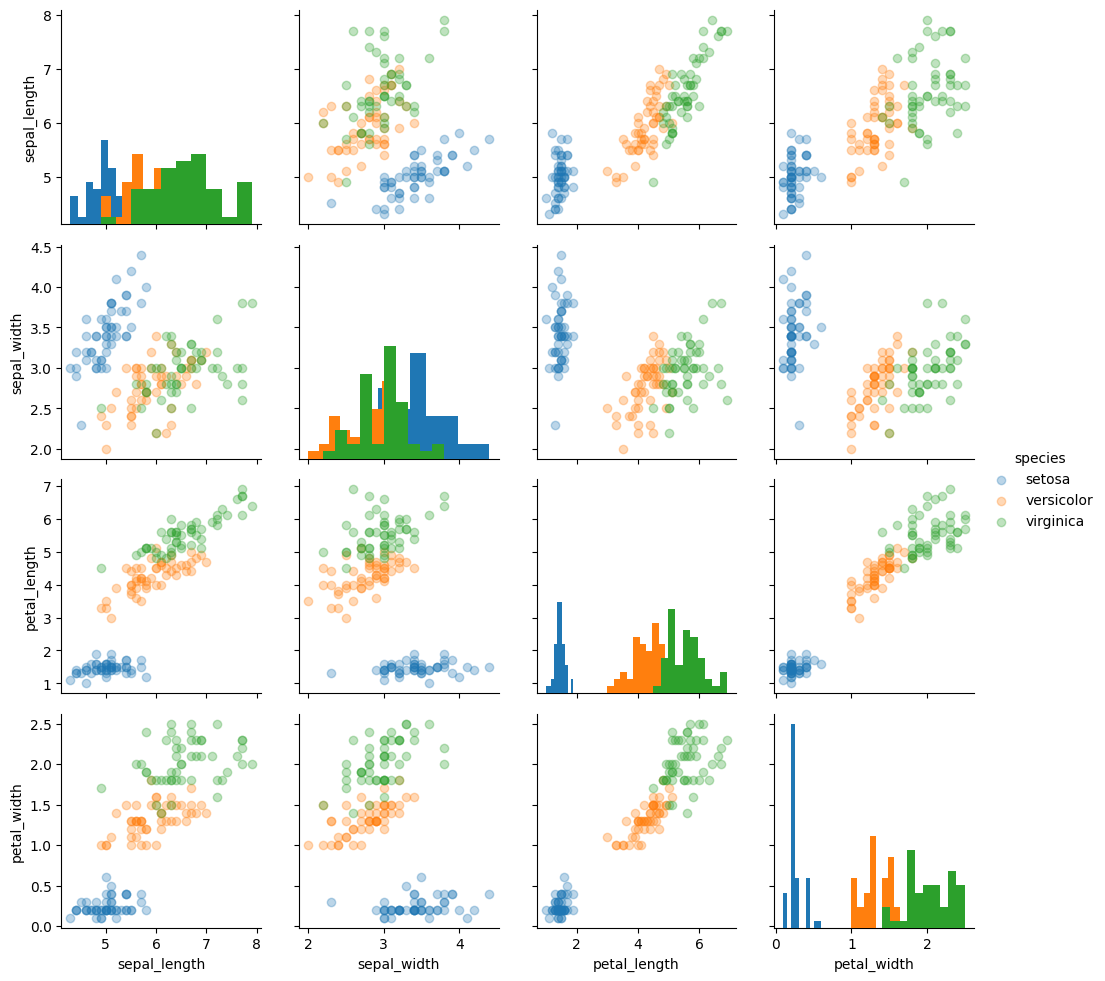

In [93]:
# 다중 그래프 시각화
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha = 0.3)
g.add_legend()
plt.show()